# Setup: Install Packages

In [ ]:
from google.colab import files
# NOTE this code was developed and tested on a google colab jupyter notebook
# (so there may be some quirks running it as a raw .py)
# download python3.7.4 and switch configuration to it
!sudo apt-get update -y
!sudo apt-get install python3.7
!sudo apt install python3-pip
!sudo apt install python3.7-distutils
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo apt-get install python3-jsonnet
!python -V

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,113 kB]
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,486 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-sec

In [ ]:
# install GRUBERT model and requirements
!git clone https://github.com/ZuowenWang0000/GRUBERT-A-GRU-Based-Method-to-Fuse-BERT-Hidden-Layers-for-Twitter-sentiment-analysis.git
%cd GRUBERT-A-GRU-Based-Method-to-Fuse-BERT-Hidden-Layers-for-Twitter-sentiment-analysis
!pip3 install allennlp==0.9.0
!pip3 install torch==1.5.1+cu101 -f https://download.pytorch.org/whl/torch_stable.html
!pip3 install --user -r requirements.txt
!pip3 install tensorboard
#%cd ..

Cloning into 'GRUBERT-A-GRU-Based-Method-to-Fuse-BERT-Hidden-Layers-for-Twitter-sentiment-analysis'...
remote: Enumerating objects: 1285, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 1285 (delta 18), reused 0 (delta 0), pack-reused 1247 (from 1)
Receiving objects: 100% (1285/1285), 3.18 MiB | 7.17 MiB/s, done.
Resolving deltas: 100% (924/924), done.
/content/GRUBERT-A-GRU-Based-Method-to-Fuse-BERT-Hidden-Layers-for-Twitter-sentiment-analysis
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.6/62.6 KB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 51.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 282.6/282.6 KB 26.2 MB/s eta 0:00:00
  

Looking in links: https://download.pytorch.org/whl/torch_stable.html
DEPRECATION: The HTML index page being used (https://download.pytorch.org/whl/torch_stable.html) is not a proper HTML 5 document. This is in violation of PEP 503 which requires these pages to be well-formed HTML 5 documents. Please reach out to the owners of this index page, and ask them to update this index page to a valid HTML 5 document. pip 22.2 will enforce this behaviour change. Discussion can be found at https://github.com/pypa/pip/issues/10825
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 704.4/704.4 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.3/491.3 KB 6.0 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 1.13.1
    Uninstalling torch-1.13.1:
      Successfully uninstalled torch-1.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 674.8/674.8 KB 7.5 MB/s eta 0:00:0

# Download/Preprocess the Data

In [ ]:
# initalize dataset/kaggle environement
!pip3 install -q kaggle
files.upload()
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c tweet-sentiment-extraction
!unzip tweet-sentiment-extraction.zip

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 KB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.5/162.5 KB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 KB 4.3 MB/s eta 0:00:00


Saving kaggle.json to kaggle.json
  0% 0.00/1.39M [00:00<?, ?B/s]
100% 1.39M/1.39M [00:00<00:00, 144MB/s]
Archive:  tweet-sentiment-extraction.zip
replace sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
import pandas as pd
traindf = pd.read_csv('train.csv')
testdf = pd.read_csv('test.csv')
electiondf = pd.read_csv('/content/GRUBERT-A-GRU-Based-Method-to-Fuse-BERT-Hidden-Layers-for-Twitter-sentiment-analysis/trump_harris_tweets.csv')

# convert labels
traindf = traindf[['text', 'sentiment']]
testdf = testdf[['text', 'sentiment']]
sentiment_mapping = {
    'positive': 2,
    'neutral': 1,
    'negative': 0
}
traindf['sentiment'] = traindf['sentiment'].map(sentiment_mapping)
testdf['sentiment'] = testdf['sentiment'].map(sentiment_mapping)
trainidx = [x for x in range(traindf.shape[0])]
testidx = [x for x in range(testdf.shape[0])]
traindf['index'] = trainidx
testdf['index'] = testidx
traindf.rename(columns={"index":"index","text": "text", "sentiment": "label"}, inplace=True)
testdf.rename(columns={"index":"index","text": "text", "sentiment": "label"}, inplace=True)
print(traindf.head())

# split the data into training and validation
ratio = 0.9

total_rows = traindf.shape[0]
train_size = int(total_rows*ratio)
print(f'Training size: {train_size}, total rows: {total_rows}')

# Split data into test and train
valdf = traindf[train_size:]
traindf = traindf[0:train_size]

# save the dfs back as csvs
traindf.to_csv('train.csv', index=False)
valdf.to_csv('val.csv', index=False)
testdf.to_csv('test.csv', index=False)

                                                text  label  index
0                I`d have responded, if I were going      1      0
1      Sooo SAD I will miss you here in San Diego!!!      0      1
2                          my boss is bullying me...      0      2
3                     what interview! leave me alone      0      3
4   Sons of ****, why couldn`t they put them on t...      0      4
Training size: 24732, total rows: 27481


In [ ]:
# show the election data
print("Election tweets:")
electiondf.head()

,trump,harris
0,#Trump is literally asleep at the RNC event. A...,As Donald Trump gets attacked today for his co...
1,So... You didn't know what 45-47 meant? Now yo...,"I'm the real deal, and I'm done with the Democ..."
2,Rep. Marjorie Taylor Greene (R-GA.) calls out ...,#MeghanMarkle pulled a #KamalaHarris and said ...
3,Didn't like the way this @JDVance1 bloke (newl...,"An update on my voice, and talking about Kamal..."
4,"“I’m a fast healer…” Also, Trump explains that...",So this happened Kamala Harris. She grabbed my...


In [ ]:
# designate first 20 rows of testing as election tweets (for convienience)
for i in range(10):
  testdf.loc[i, 'text'] = electiondf.loc[i, 'trump']

for i in range(10, 20):
  testdf.loc[i, 'text'] = electiondf.loc[i-10, 'harris']

In [ ]:
testdf.to_csv('test.csv', index=False)

# Train the model

In [ ]:
# invoke GRUBERT code to run training
!python train.py --config /content/GRUBERT-A-GRU-Based-Method-to-Fuse-BERT-Hidden-Layers-for-Twitter-sentiment-analysis/bert_share_3_tse_tune.json --embedding bert-mix --seed 0
#!python train.py --help --seed 0

Using seed: 0
{'model': {'architecture': 'BertWSModel', 'n_classes': 3, 'gru_hidden_size': 100, 'num_gru_layers': 1, 'num_grus': 3, 'linear_hidden_size': 100, 'dropout': 0.5, 'fine_tune_embeddings': True, 'sentence_length_cut': 40, 'device': 'torch.device("cuda" if torch.cuda.is_available() else "cpu")', 'use_regularization': 'none', 'regularization_lambda': 0}, 'training': {'start_epoch': 0, 'batch_size': 64, 'lr': 2e-05, 'lr_decay': 0.85, 'momentum': 0.9, 'workers': 8, 'epochs': 15, 'grad_clip': 'none', 'print_freq': 1000, 'checkpoint': 'none', 'save_checkpoint_freq_epoch': 1, 'save_checkpoint_path': '/cluster/scratch/__USER__/logdir/bert_share_3_bs64_ft_para', 'train_without_val': False, 'weight_decay': 0.0}, 'dataset': {'dataset_dir': '.', 'rel_train_path': 'train.csv', 'rel_val_path': 'val.csv', 'rel_test_path': 'test.csv'}}
Checkpoints will be saved in: /cluster/scratch/root/logdir/bert_share_3_bs64_ft_para_seed0
[bert-mix] initializing embedder
[bert-mix] initializing embeddings

# Make predictions

In [ ]:
# invoke GRUBERT code to run preditions
!python predict.py --config /content/GRUBERT-A-GRU-Based-Method-to-Fuse-BERT-Hidden-Layers-for-Twitter-sentiment-analysis/bert_share_3_tse_tune.json --embedding bert-mix --checkpoint /content/GRUBERT-A-GRU-Based-Method-to-Fuse-BERT-Hidden-Layers-for-Twitter-sentiment-analysis/checkpoint_epoch_3.pth.tar --predict-file ./pred_cat_2.csv

[bert-mix] initializing embeddings+dataset
bert-mix entering prediction loop
Model has built-in embedder, using it
0
PREDICTIONS: tensor([0, 1, 0, 0, 2, 1, 1, 1], device='cuda:0')
1
PREDICTIONS: tensor([1, 2, 0, 1, 1, 2, 1, 1], device='cuda:0')
2
PREDICTIONS: tensor([1, 2, 0, 2, 0, 1, 0, 1], device='cuda:0')
3
PREDICTIONS: tensor([0, 2, 1, 0, 1, 0, 1, 1], device='cuda:0')
4
PREDICTIONS: tensor([1, 1, 1, 2, 2, 0, 0, 0], device='cuda:0')
5
PREDICTIONS: tensor([1, 1, 1, 1, 2, 2, 1, 2], device='cuda:0')
6
PREDICTIONS: tensor([0, 0, 1, 1, 0, 2, 1, 2], device='cuda:0')
7
PREDICTIONS: tensor([2, 0, 1, 2, 1, 1, 1, 0], device='cuda:0')
8
PREDICTIONS: tensor([2, 0, 1, 1, 0, 1, 2, 2], device='cuda:0')
9
PREDICTIONS: tensor([0, 1, 1, 0, 0, 0, 1, 1], device='cuda:0')
10
PREDICTIONS: tensor([2, 1, 1, 2, 2, 1, 0, 0], device='cuda:0')
11
PREDICTIONS: tensor([1, 1, 1, 2, 1, 1, 2, 1], device='cuda:0')
12
PREDICTIONS: tensor([0, 1, 1, 2, 1, 0, 2, 0], device='cuda:0')
13
PREDICTIONS: tensor([1, 1, 1, 1, 1

In [ ]:
# compare output file with test.tsv and calculate metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
prediction_fname = '/content/GRUBERT-A-GRU-Based-Method-to-Fuse-BERT-Hidden-Layers-for-Twitter-sentiment-analysis/pred_cat_2.csv'

preddf = pd.read_csv(prediction_fname)
y_true = testdf['label']
y_pred = preddf['Prediction']
y_true.head()
y_pred.head()

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

#auc = roc_auc_score(y_true, preddf['pred_proba'])

# Print metrics
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
#print(f'AUC: {auc}')

Accuracy: 0.7863610639501981
Precision: 0.7929109817153513
Recall: 0.7863610639501981
F1 Score: 0.7876625506441249


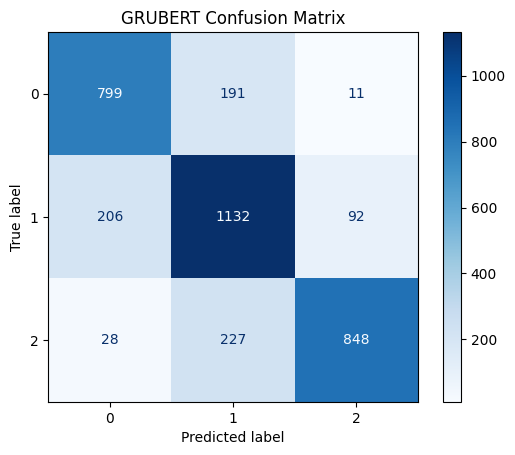

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2])
disp.plot(cmap=plt.cm.Blues)  # You can choose any colormap
plt.title('GRUBERT Confusion Matrix')
plt.show()

In [ ]:
# per class matrix summary
report = classification_report(y_true, y_pred, output_dict=True)
accuracy_per_class = {key: value['f1-score'] for key, value in report.items() if key.isdigit()}
print(report)

accuracy_per_class = accuracy_score(y_true, y_pred, normalize=False)
precision_per_class = precision_score(y_true, y_pred, average=None)
recall_per_class = recall_score(y_true, y_pred, average=None)
f1_per_class = f1_score(y_true, y_pred, average=None)

# Create a DataFrame to summarize the metrics
metrics_summary = pd.DataFrame({
    'Class': [0, 1, 2],
    'Precision': precision_per_class,
    'Recall': recall_per_class,
    'F1 Score': f1_per_class
})

# Calculate ROC-AUC
y_true_binarized = label_binarize(y_true, classes=[0, 1, 2])
probsdf = pd.read_csv('/content/GRUBERT-A-GRU-Based-Method-to-Fuse-BERT-Hidden-Layers-for-Twitter-sentiment-analysis/pred_cat_prob.csv')
auc_scores = {}
for i in range(3):
    if i == 0:
        y_pred_proba = probsdf['Prob0']
    elif i == 1:
        y_pred_proba = probsdf['Prob1']
    else:
        y_pred_proba = probsdf['Prob2']
    auc_scores[i] = roc_auc_score(y_true_binarized[:, i], [x for x in y_pred_proba])

print(f"AUC-ROC Value: {auc_scores}")

print(metrics_summary)

{'0': {'precision': 0.7734753146176185, 'recall': 0.7982017982017982, 'f1-score': 0.7856440511307768, 'support': 1001.0}, '1': {'precision': 0.7303225806451613, 'recall': 0.7916083916083916, 'f1-score': 0.7597315436241611, 'support': 1430.0}, '2': {'precision': 0.8916929547844374, 'recall': 0.7688123300090662, 'f1-score': 0.8257059396299903, 'support': 1103.0}, 'accuracy': 0.7863610639501981, 'macro avg': {'precision': 0.7984969500157391, 'recall': 0.7862075066064187, 'f1-score': 0.7903605114616427, 'support': 3534.0}, 'weighted avg': {'precision': 0.7929109817153513, 'recall': 0.7863610639501981, 'f1-score': 0.7876625506441249, 'support': 3534.0}}
AUC-ROC Value: {0: 0.9362564005280151, 1: 0.8826178574277433, 2: 0.943735215240735}
   Class  Precision    Recall  F1 Score
0      0   0.773475  0.798202  0.785644
1      1   0.730323  0.791608  0.759732
2      2   0.891693  0.768812  0.825706


In [ ]:
# save results as csv
y_pred.to_csv('ypred.csv', index=False)
y_true.to_csv('ytrue.csv', index=False)